## ワインの種類

このデータフレームには、ワインの化学的特徴を示す13個の特徴量と、それぞれのワインが属するクラス（0, 1, 2のいずれか）を示すターゲット列が含まれています。

1. **特徴量 (Features):**
   - Alcohol: アルコールの濃度
   - Malic acid: リンゴ酸の濃度
   - Ash: 灰の濃度
   - Alcalinity of ash: 灰のアルカリ度
   - Magnesium: マグネシウムの濃度
   - Total phenols: 総フェノールの濃度
   - Flavanoids: フラボノイドの濃度
   - Nonflavanoid phenols: ノンフラボノイドフェノールの濃度
   - Proanthocyanins: プロアントシアニジンの濃度
   - Color intensity: 色の濃度
   - Hue: 色相
   - OD280/OD315 of diluted wines: 希釈されたワインの光学的密度
   - Proline: プロリンの濃度

2. **ターゲット列 (Target):**
   - 0: クラス1に属するワイン
   - 1: クラス2に属するワイン
   - 2: クラス3に属するワイン


## 1. 基本統計量の算出

### GPT スクリプト : データのインポート
* from sklearn.datasets import load_wine を利用
* load_wine() でwineデータセットをロード
* 特徴量を含むデータフレームに変換する。ターゲット列をデータフレームに追加する
* データフレーム名はdfとする
* データフレームdfを表示する
* Pythonコード

In [1]:
import pandas as pd
from sklearn.datasets import load_wine

# ワインデータセットをロード
wine_data = load_wine()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = wine_data.target

df.to_csv('wine_data.csv')
# データフレームdfを表示する
df


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

### GPT プロンプト : 基本統計量の算出
   - Alcohol: アルコールの濃度
   - Malic acid: リンゴ酸の濃度
   - Ash: 灰の濃度
   - Alcalinity of ash: 灰のアルカリ度
   - Magnesium: マグネシウムの濃度
   - Total phenols: 総フェノールの濃度
   - Flavanoids: フラボノイドの濃度
   - Nonflavanoid phenols: ノンフラボノイドフェノールの濃度
   - Proanthocyanins: プロアントシアニジンの濃度
   - Color intensity: 色の濃度
   - Hue: 色相
   - OD280/OD315 of diluted wines: 希釈されたワインの光学的密度
   - Proline: プロリンの濃度

* target: wineの種類を示す目的変数（0、1、2）
* このデータ構造を使う
* データフレームdfの基本統計量を算出
* 基本統計量をcsvで保存
* 基本統計量をヒートマップで表示
* Pythonコード

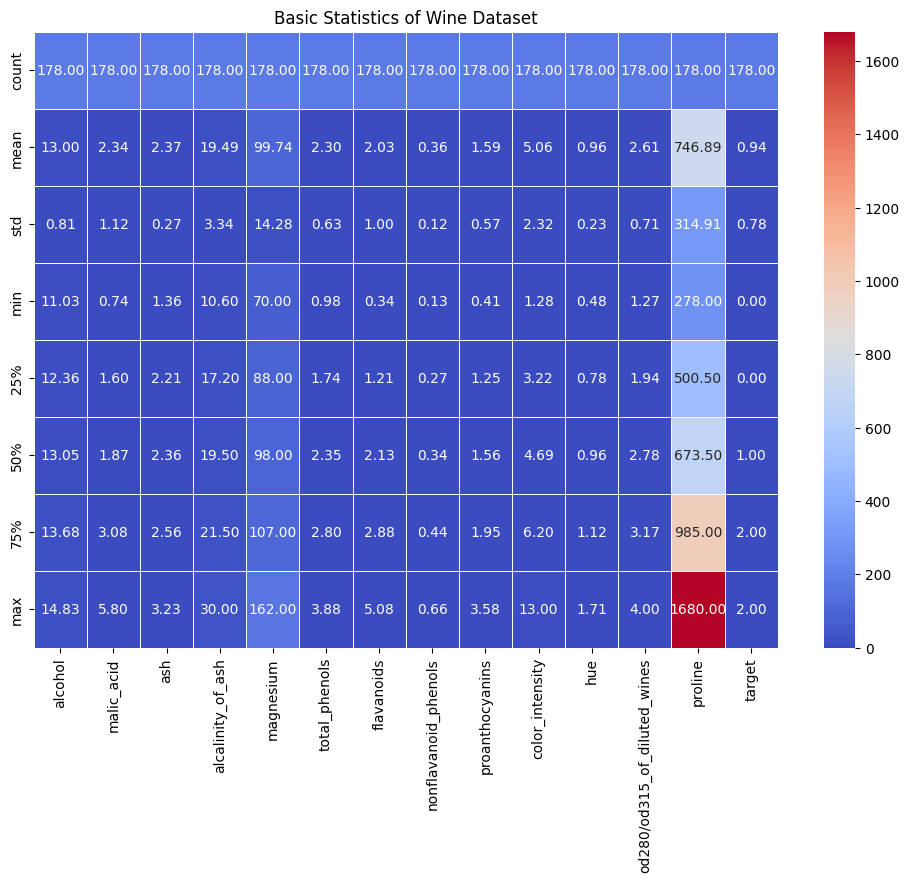

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# ワインデータセットをロード
wine_data = load_wine()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = wine_data.target

# 基本統計量を算出
statistics = df.describe()

# 基本統計量をCSVで保存
statistics.to_csv('wine_statistics.csv')

# ヒートマップで基本統計量を表示
plt.figure(figsize=(12, 8))  # フィギュアサイズの調整
sns.heatmap(statistics, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Basic Statistics of Wine Dataset')
plt.show()


## 1. 基本統計量の算出：箱ひげ図

ボックスプロット（箱ひげ図）は、データの分布を視覚的に表現するための統計的グラフです。データの中央値、四分位範囲（データの広がりや散らばり具合）、外れ値を示すことができます。以下はボックスプロットの主な構成要素です：

1. **中央値（メディアン）**: データセットを二等分する値で、ボックスプロットの中央に横線で表示されます。
2. **四分位範囲（IQR: Interquartile Range）**: 下位25%（第1四分位数、Q1）と上位25%（第3四分位数、Q3）のデータの範囲を示します。この範囲はボックスの形で表され、データの中心的な50%を含みます。
3. **ボックス**: 第1四分位数から第3四分位数までの範囲を示し、データの中央50%がこの範囲に含まれます。
4. **ひげ（ホイスカー）**: ボックスの外に伸びる線で、通常、第1四分位数から1.5*IQRよりも低いデータ点と、第3四分位数から1.5*IQRよりも高いデータ点までを示します。これにより、データの全範囲（外れ値を除く）が視覚化されます。
5. **外れ値**: ひげの外にあるデータポイントで、通常は点で表されます。これらは、他のデータと比較して異常に高い値または低い値を持つデータポイントです。

ボックスプロットは、データセット内の異常値の検出、データの散らばり度合いの評価、そして異なるデータセットの中央値や分布の比較に特に有用です。データの分布形状（対称性や歪み）について直接的な情報は提供しませんが、データの要約として非常に役立ちます。

### GPT プロンプト : 箱ひげ図
* 数値カラムのボックスプロットを作成
* ボックスプロットの要約統計量をDataFrameに変換し、CSVファイルとして保存
* グラフは1行に5つのプロットが表示
* 各ボックスプロットには、それぞれのカラム名がタイトルとして表示
* boxplotは縦向き
* Pythonコード

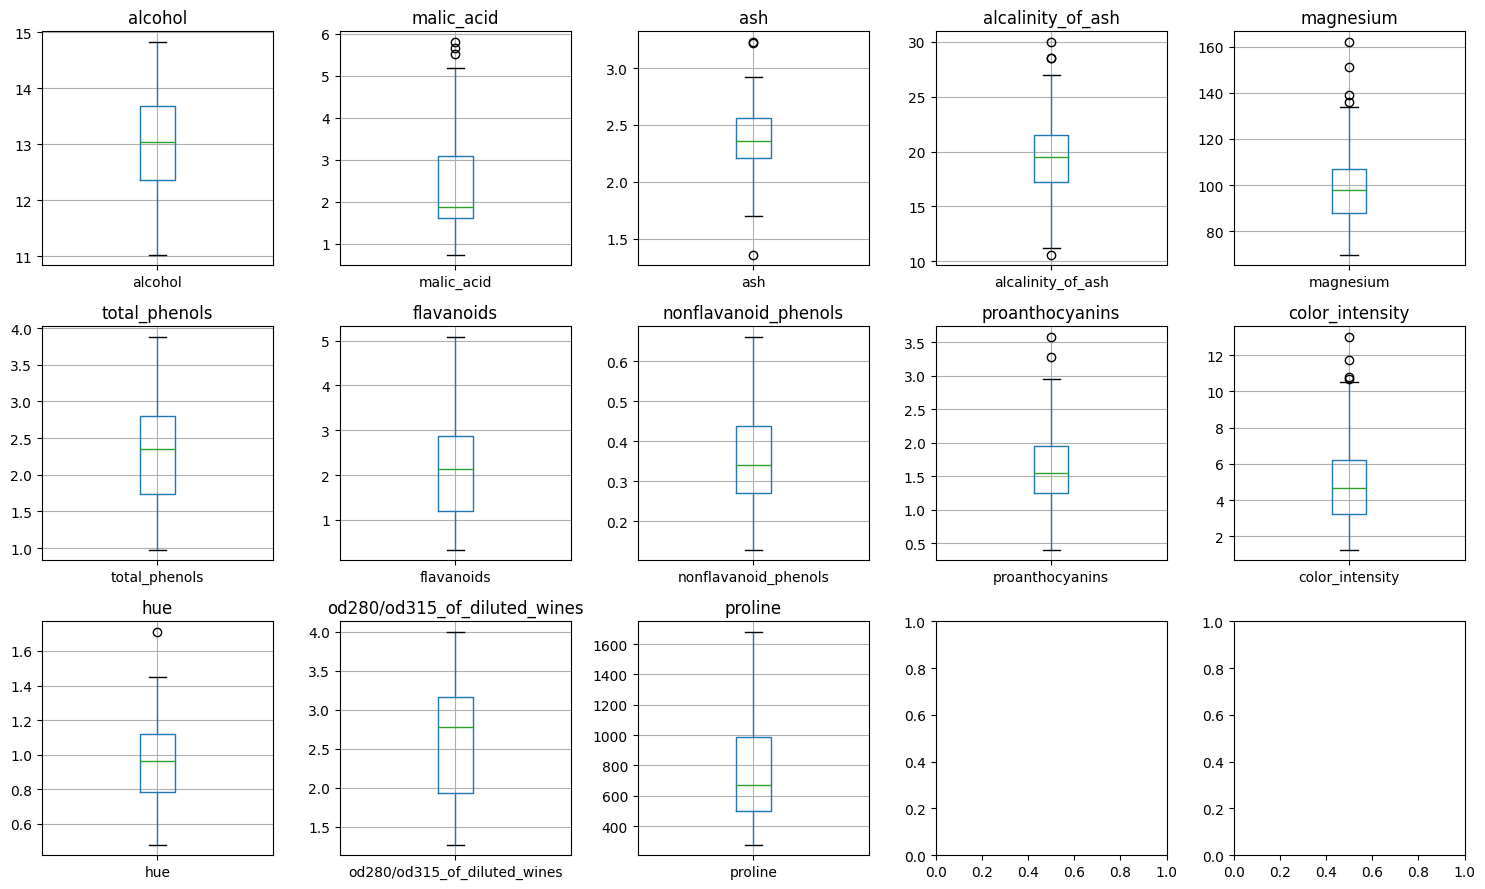

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# ワインデータセットをロード
wine_data = load_wine()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = wine_data.target

# ボックスプロットを作成し、1行に5つのプロットが表示されるようにする
num_plots = df.shape[1] - 1  # ターゲット列を除く
num_rows = (num_plots - 1) // 5 + 1
fig, axes = plt.subplots(num_rows, 5, figsize=(15, num_rows * 3))

# ボックスプロットを作成し、要約統計量をDataFrameに変換して保存する
summary_statistics = pd.DataFrame()
for i, column in enumerate(df.columns[:-1]):  # ターゲット列を除く
    row_index = i // 5
    col_index = i % 5
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    df.boxplot(column=column, ax=ax, vert=True)
    ax.set_title(column)

    # ボックスプロットの要約統計量をDataFrameに追加
    summary_statistics[column] = df[column].describe()

# グラフのレイアウトを整える
plt.tight_layout()

# ボックスプロットの要約統計量をCSVファイルとして保存
summary_statistics.to_csv('wine_boxplot_summary_statistics.csv')

# グラフを表示
plt.show()


## 2. データの可視化：ヒストグラム

### GPT プロンプト : ヒストグラム
* 全ての数値カラムのヒストグラムを作成
* グラフは1行に3つのグラフが表示
* グラフの行数は数値カラムで決める
* 各ヒストグラムには、それぞれのカラム名がタイトルとして表示
* ヒストグラムは縦向き
* Pythonコード

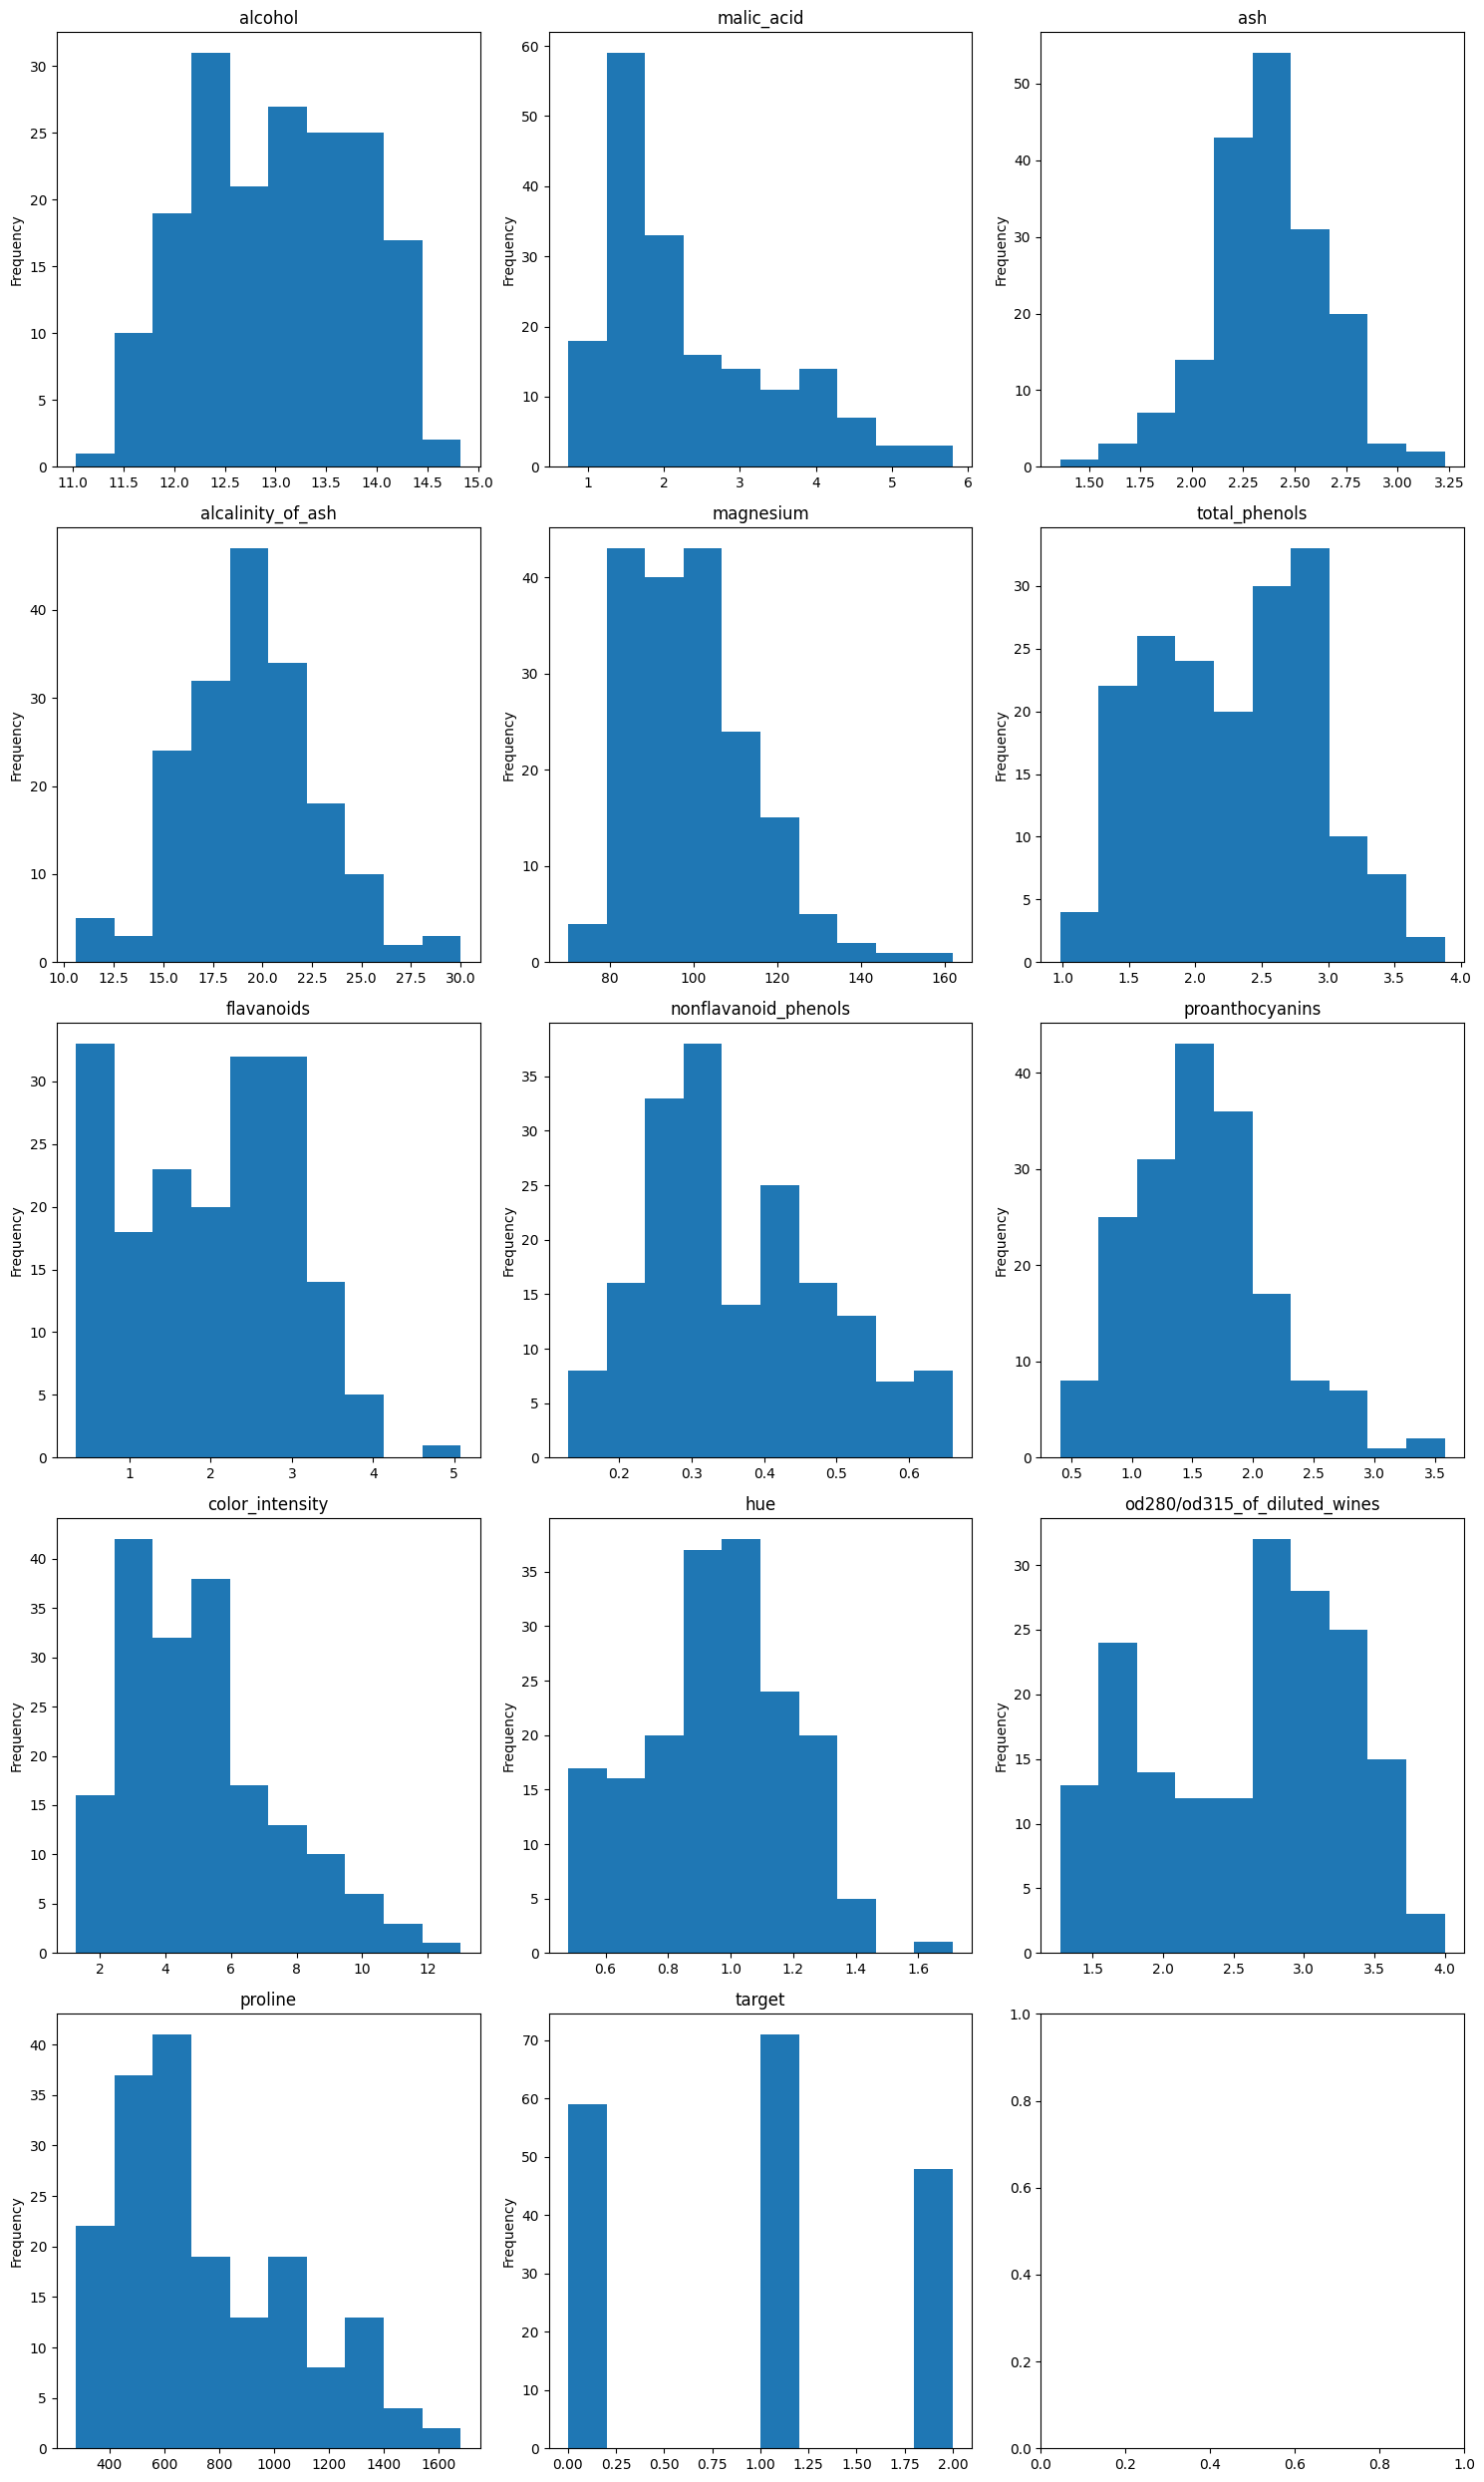

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# ワインデータセットをロード
wine_data = load_wine()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = wine_data.target

# 数値カラムのみを選択
numeric_columns = df.select_dtypes(include='number').columns

# ヒストグラムを作成し、1行に3つのグラフが表示されるようにする
num_plots = len(numeric_columns)
num_rows = (num_plots - 1) // 3 + 1
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# ヒストグラムを作成
for i, column in enumerate(numeric_columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    df[column].plot(kind='hist', ax=ax)
    ax.set_title(column)

# グラフのレイアウトを整える
plt.tight_layout()

# グラフを表示
plt.show()


## 2. データの可視化：散布図

量的データと質的データの組み合わせを可視化するためのさまざまな方法を以下にまとめます。

1. **散布図（Scatter plot）**: 量 × 量
   - 量的変数と量的変数の関係を視覚化するのに適しています。
   - 例えば、身長（量的データ）と体重（量的データ）の関係を見ることができます。
   - 質的変数が2つの場合は、散布図の色分けやマーカーの形状を使って区別することができます。

2. **箱ひげ図（Boxplot）**: 質 × 量
   - 量的変数を質的変数でグループ分けして、各グループの分布を比較するのに適しています。
   - 例えば、都道府県（質的データ）ごとに病院数（量的データ）の分布を比較することができます。

3. **クロス集計表（Cross-tabulation）**: 質 × 質
   - 2つの質的変数の関係をまとめた表です。各セルにはそれぞれの組み合わせに対応するデータの個数が表示されます。
   - 例えば、性別（質的データ）と好きなスポーツ（質的データ）の関係を示すことができます。

4. **グループ化された棒グラフ（Grouped bar chart）**: 積み上げグラフ
   - 2つの質的変数の組み合わせによる量的変数の平均値などの統計量を視覚化するのに適しています。
   - 例えば、都道府県（質的データ）ごとに男女の平均身長（量的データ）を比較することができます。

5. **バブルチャート（Bubble chart）**:
   - 2つの量的変数と1つの質的変数を組み合わせて可視化するのに使用されます。
   - 例えば、都道府県（質的データ）ごとの人口（量的データ）、平均所得（量的データ）をバブルの大きさや色で表現することができます。

これらの方法を使用することで、量的データと質的データの組み合わせによるパターンや関係を効果的に可視化することができます。

### GPT プロンプト : 散布図
* 全ての数値カラムの組み合わせで散布図を作成
* seabornのライブラリを使い、マトリックス表示
* 回帰直線も描く
* Pythonコード

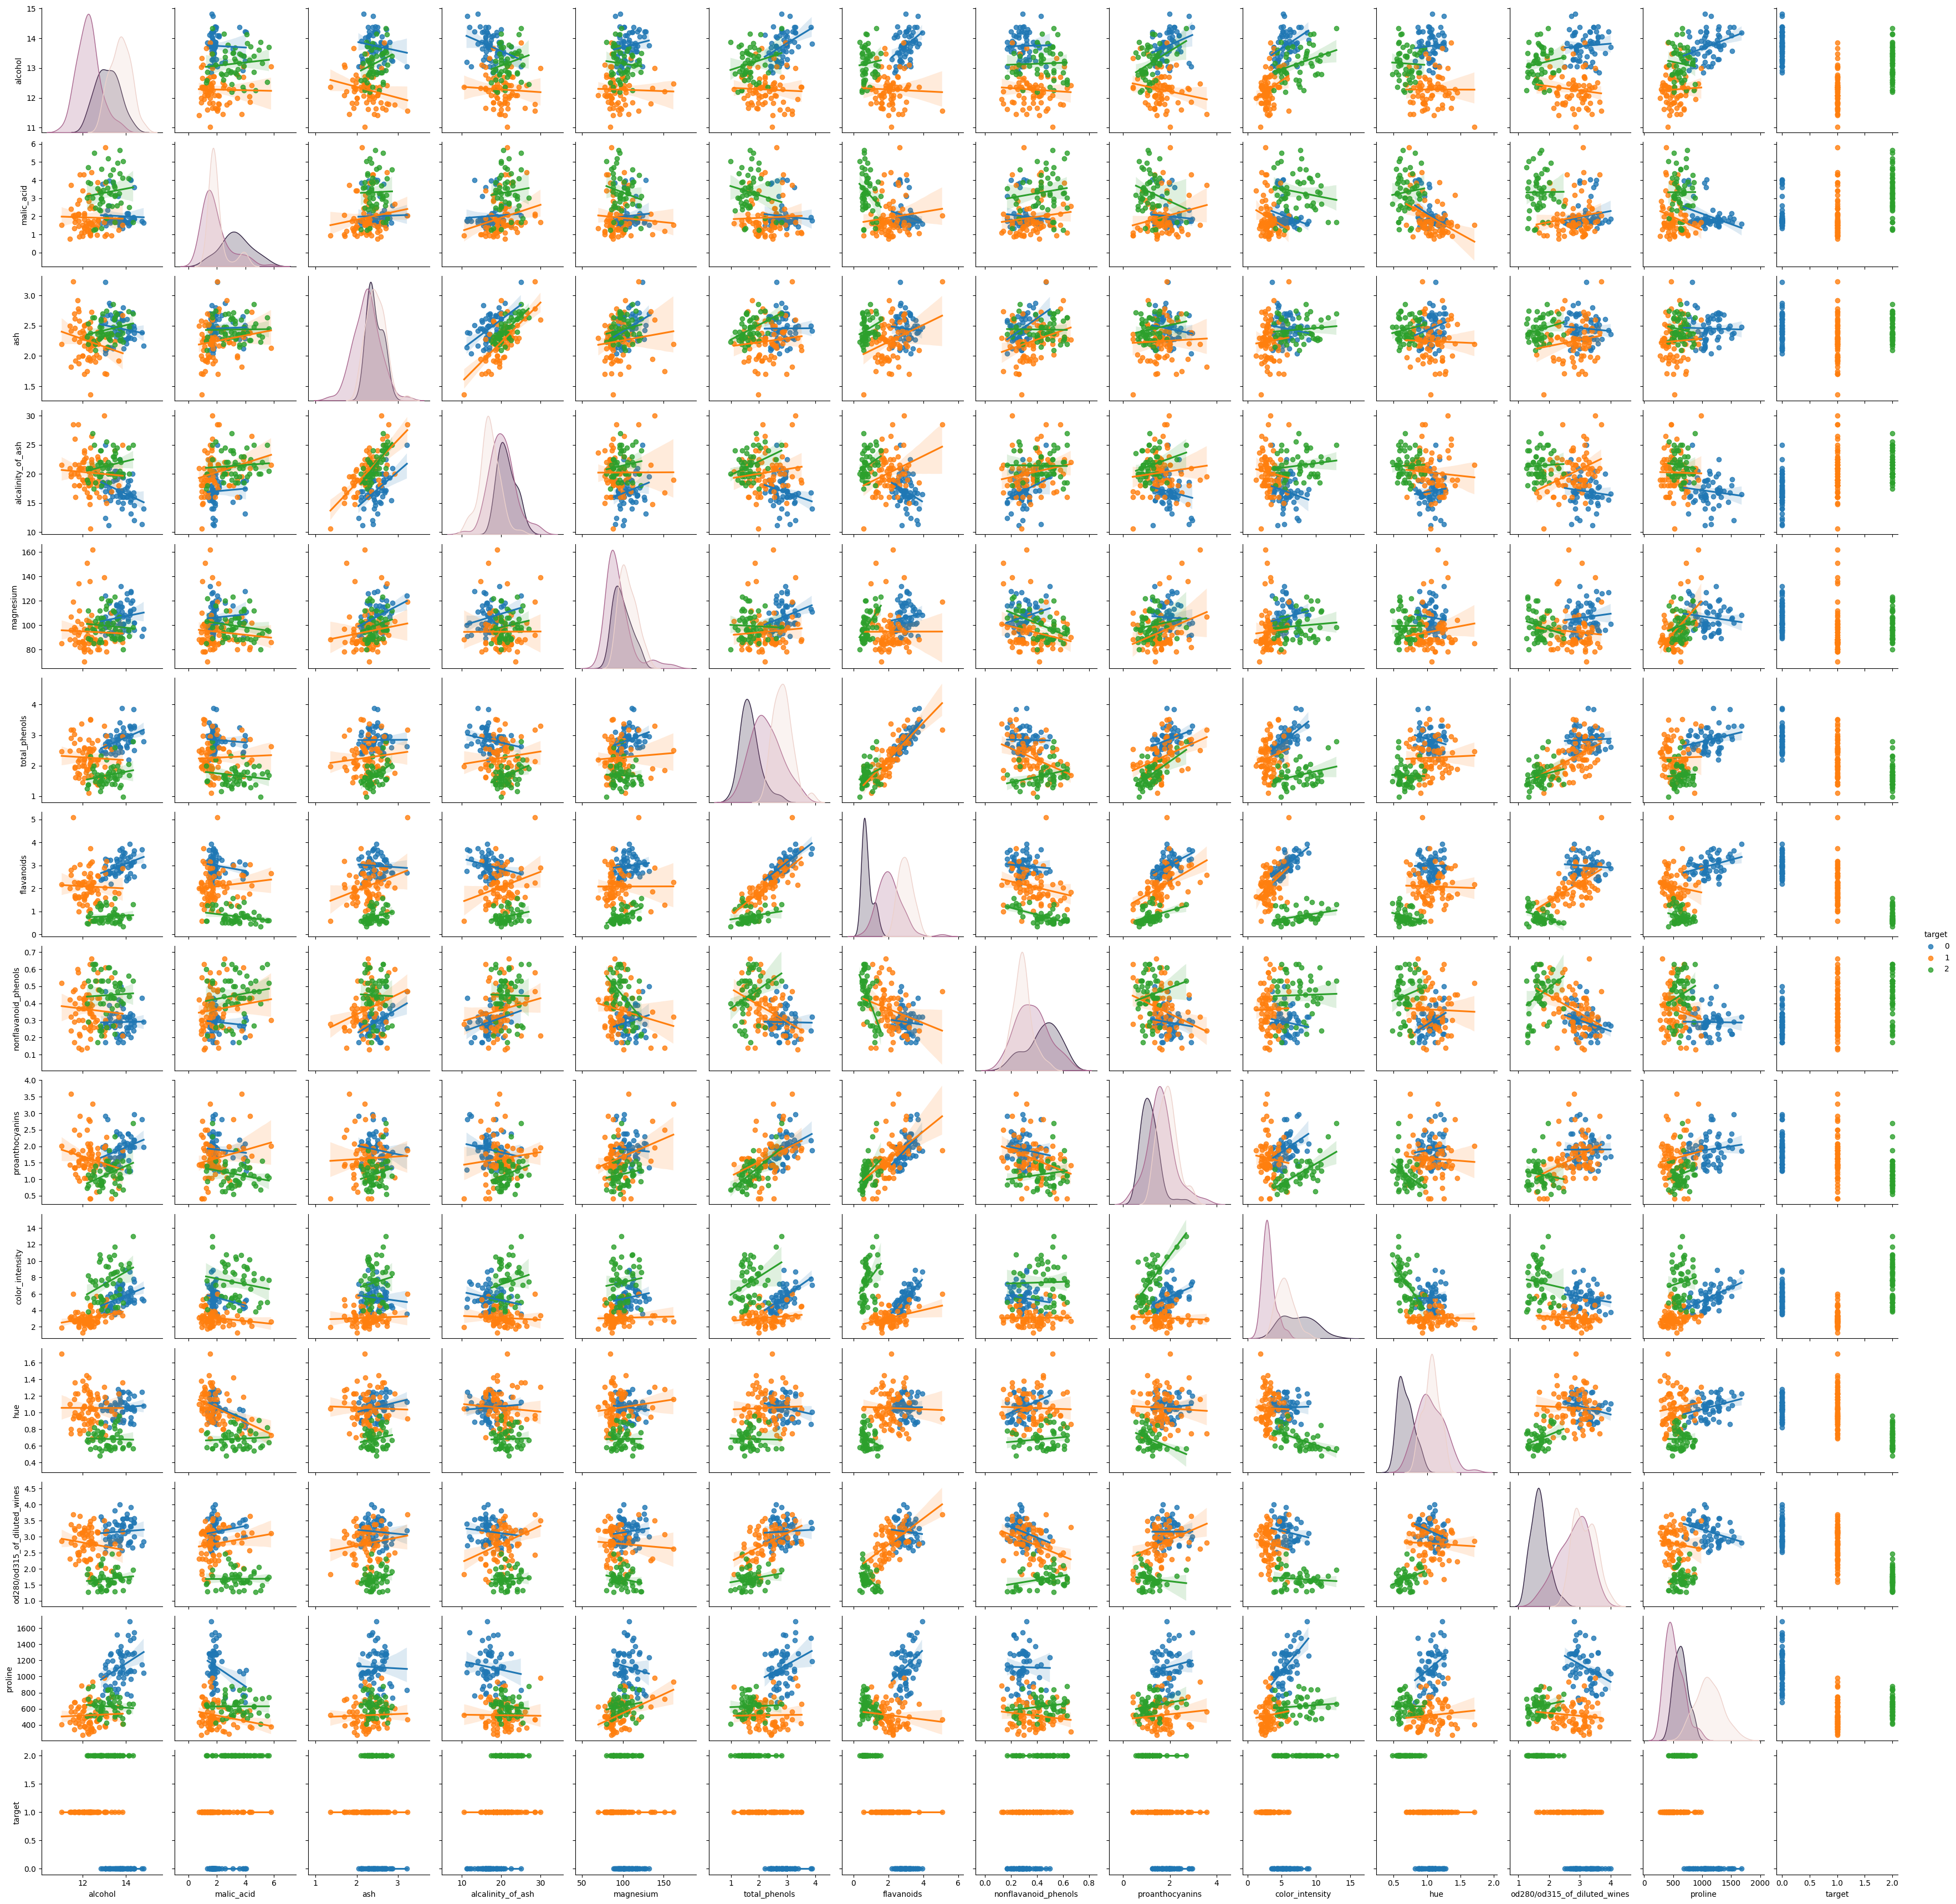

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# ワインデータセットをロード
wine_data = load_wine()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = wine_data.target

# 数値カラムのみを選択
numeric_columns = df.select_dtypes(include='number').columns

# seabornのpairplotを使って散布図行列を作成
sns.pairplot(df, vars=numeric_columns, hue='target', kind='reg')

# グラフを表示
plt.show()


## 2. データの可視化：相関係数行列

### GPT プロンプト : 相関係数行列
* 全ての数値カラムの組み合わせで相関係数行列を作成
* ヒートマップで表示
* Pythonコード

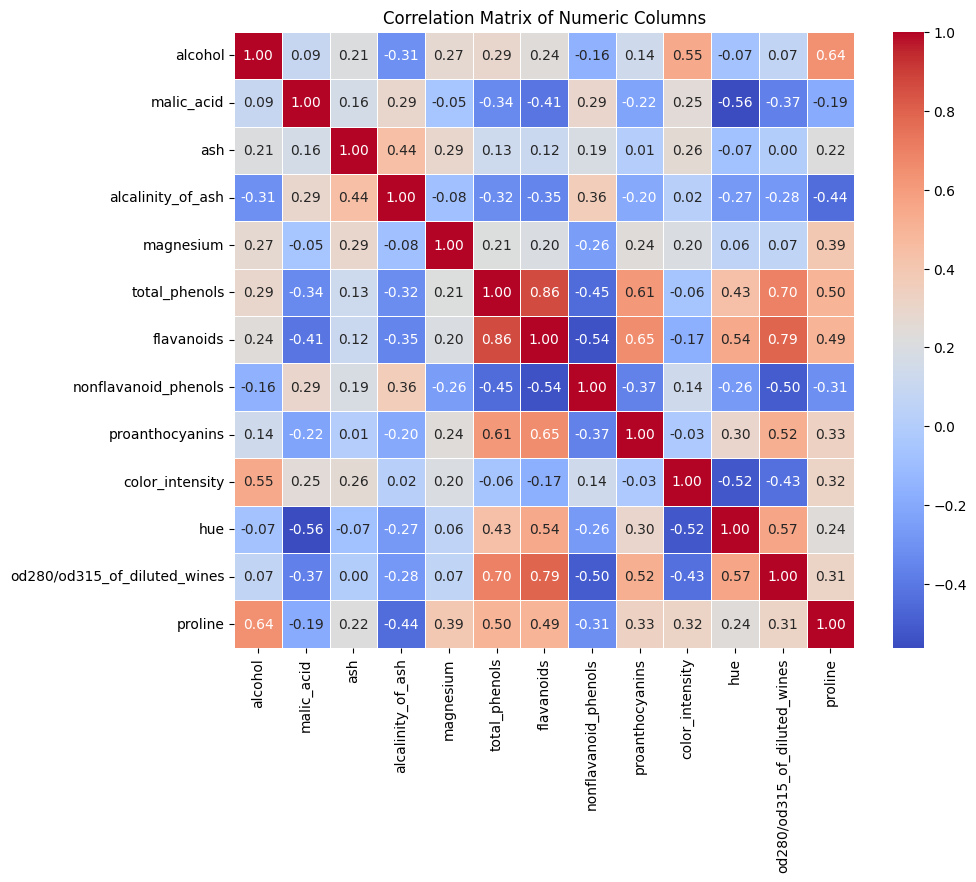

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# ワインデータセットをロード
wine_data = load_wine()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# 数値カラムのみを選択
numeric_columns = df.select_dtypes(include='number')

# 相関係数行列を計算
correlation_matrix = numeric_columns.corr()

# ヒートマップで相関係数行列を表示
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()



## 4. 主成分分析

主成分分析（Principal Component Analysis、PCA）は、多変量データの次元削減とデータの可視化によく用いられる統計的手法です。PCAは、元の特徴量の情報をできるだけ保持しながら、新しい変数（主成分）にデータを変換することで、データセットの次元を削減します。

主成分分析の主な目的は、データの持つ情報を最大限に保持しながら、データの構造やパターンを理解することです。具体的には、以下のような利点があります：

1. **次元削減**:
   - 元のデータセットが多次元の場合、主成分分析はデータの次元を削減し、情報を失うことなくデータの本質的な特性を捉えます。これにより、高次元のデータをより低次元の空間にマッピングすることが可能になります。

2. **可視化**:
   - 主成分分析によって得られた主成分は、視覚化に適した形式であり、データセットの構造やパターンを理解するのに役立ちます。特に、2次元または3次元の主成分空間では、データをプロットして視覚的に解釈することが容易です。

3. **特徴量の重要度の理解**:
   - 主成分分析は、元の特徴量と主成分との関係性を示す主成分負荷（重み）を提供します。これにより、どの特徴量が主成分に大きく影響しているかを理解し、データセット内の重要なパターンや相関関係を特定することができます。

4. **ノイズの除去**:
   - 主成分分析は、データ内のノイズや冗長性を排除する効果があります。主成分はデータの変動性に基づいて決定されるため、ノイズの影響を減らし、データセットの本質的な構造をより良く捉えることができます。

総括すると、主成分分析は複雑なデータセットの解析や可視化、モデリングに広く使用される強力なツールです。データの情報を最大限に活用しながら、データセットの特性やパターンを効果的に把握することができます。

主成分分析（PCA）を実行する手順を以下に示します：

1. **データの準備**:
   - 分析対象のデータセットを準備します。データセットは観測値（サンプル）が行に配置され、それぞれの観測値に対する特徴量が列に配置されている必要があります。

2. **データの標準化**:
   - 主成分分析は、特徴量のスケールの違いが結果に影響を与える可能性があるため、特徴量を標準化します。これにより、すべての特徴量が平均が0で標準偏差が1になります。

3. **主成分分析の実行**:
   - 標準化されたデータに対してPCAを実行します。PCAは、特徴量間の共分散を考慮してデータを新しい特徴空間に射影することで、特徴量を線形に組み合わせた新しい特徴量（主成分）を生成します。

4. **主成分の選択**:
   - 主成分分析の結果得られる主成分は、元の特徴量の線形結合であり、元の特徴量の変動性を説明します。通常、累積寄与率や固有値などの指標を用いて、どの程度の主成分を選択するかを決定します。

5. **結果の解釈**:
   - 主成分の解釈は元の特徴量との関係性を理解することから始まります。主成分のウェイト（係数）を確認し、各主成分が元の特徴量とどのような関係を持っているかを分析します。

6. **結果の可視化**:
   - 主成分空間でのデータのプロットや主成分のウェイトの可視化を行うことで、データの構造や変数間の関係を理解しやすくします。

以上が主成分分析の一般的な手順です。この手順に従うことで、データセットの次元削減やパターンの特定など、さまざまな目的に応じた主成分分析を行うことができます。

### GPT プロンプト : 主成分分析

* 全ての数値カラムを利用(targetは除く)
* 利用数値カラムに対して、標準化を実施(StandardScaler)
* 累積寄与率80%で主成分分析を実施、以下得られた主成分のみを利用する
* 得られた各主成分の寄与率(explained_variance_ratio_)と、累積寄与率(np.cumsum())を計算し、累積寄与率を折れ線グラフで描く
* 主成分ごとの変数の重み（ウェイト）(components_)を取得し、各主成分の寄与率を加え、データフレーム化してcsvで保存
* 各主成分のカラムをx軸とした棒グラフを作成(説明変数のみ)
* PC1とPC2の散布図を作成し、各カラムの方向を矢印で示し、各点をtargetの値で色分けする
* Pythonコード

矢印の長さ、カラム名のラベルは各自調整

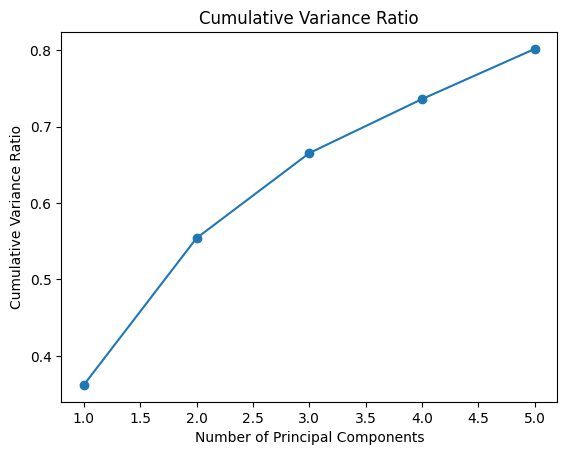

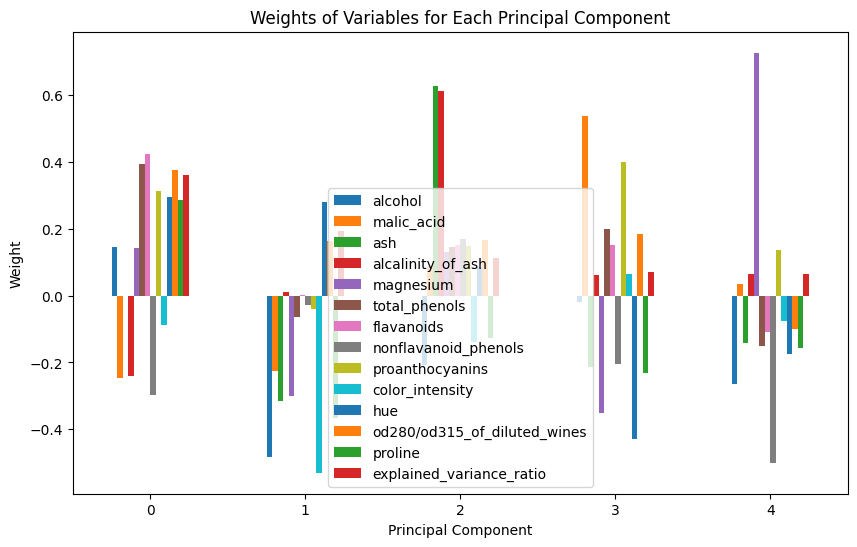

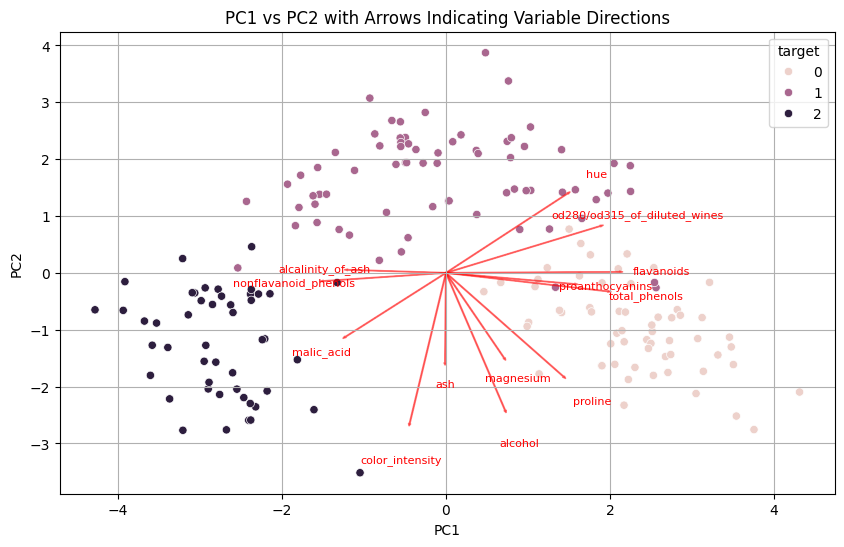

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 標準化を実施
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 主成分分析を実行
pca = PCA(n_components=0.8)
pca_data = pca.fit_transform(scaled_data)

# 寄与率と累積寄与率を計算
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 寄与率の折れ線グラフを描く
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

# 主成分の重みを取得
components_df = pd.DataFrame(pca.components_, columns=df.columns)

# 主成分の寄与率を加えてデータフレーム化して保存
components_df['explained_variance_ratio'] = explained_variance_ratio
components_df.to_csv('pca_components.csv', index=False)

# 主成分ごとの変数の重みを棒グラフで描く
components_df.plot(kind='bar', figsize=(10, 6))
plt.title('Weights of Variables for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Weight')
plt.xticks(rotation=0)
plt.show()

# PC1とPC2の散布図を作成し、各カラムの方向を矢印で示し、各点をtargetの値で色分けする
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, pca_data.shape[1] + 1)])
pca_df['target'] = wine_data.target

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='target')

# 各主成分の方向を矢印で示す
for i, column in enumerate(components_df.columns[:-1]):
    plt.arrow(0, 0, components_df.loc[0, column]*5, components_df.loc[1, column]*5, color='r', alpha=0.5, width=0.01)
    plt.text(components_df.loc[0, column] * 6.2, components_df.loc[1, column] * 6.2, column, color='r', ha='center', va='center', fontsize=8)

plt.title('PC1 vs PC2 with Arrows Indicating Variable Directions')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='target')
plt.grid()
plt.show()


## 5. クラスタリング

主成分分析を使ったクラスタリングの流れは以下のようになります：

1. **データの準備**:
   - 分析対象のデータセットを準備します。データは数値型である必要があります。また、必要に応じて欠損値の処理やデータのスケーリング（標準化など）を行います。

2. **主成分分析の実行**:
   - 準備したデータセットに対して主成分分析（PCA）を実行します。これにより、元の特徴量を新しい線形結合である主成分に変換します。

3. **主成分の選択**:
   - 分析目的や次元削減の目標に基づいて、いくつかの主成分を選択します。通常は、累積寄与率や固有値などを参考にして適切な主成分の数を決定します。

4. **射影行列の取得**:
   - 選択した主成分に対応する射影行列を取得します。これは、元の特徴量と主成分との間の重みを示します。

5. **データの主成分空間への射影**:
   - 取得した射影行列を使用して、元のデータを主成分空間に射影します。これにより、各データポイントが主成分に沿って新しい座標系に変換されます。

6. **クラスタリングの実行**:
   - 射影されたデータを対象に、選択したクラスタリング手法（ここではk-means）を実行します。クラスタ数は事前に決定する必要があります。

7. **クラスタリング結果の可視化**:
   - クラスタリングされたデータを可視化するために、主成分空間上でデータポイントをプロットします。ここでは、主成分1と主成分2を軸にしてデータをプロットし、各クラスタを異なる色で表示します。

8. **クラスタリング結果の解釈**:
   - クラスタリングされたデータを分析し、各クラスタが表す意味や特性を理解します。必要に応じて、クラスタリング結果に基づいてデータのセグメンテーションや特性の把握を行います。

このように、主成分分析を用いたクラスタリングでは、データの次元削減とクラスタリングが組み合わされ、データの構造やパターンを理解するための効果的な手法となります。

### GPT プロンプト : クラスタリング

* PCAによって得られた射影行列を使用して、元のデータを主成分空間に射影する(累積寄与率が80％)
* 射影されたデータに対してK-meansクラスタリングを実行(クラスタ数3, n_clusters=3)
* クラスタリング結果をPC1とPC2を使い散布図で表示(Target値で色分け、クラスタで形を変える)
* targetとクラスタリング結果を比較(targetとクラスタの表を作成)
* クラスタリング結果を元のデータフレームに追加し、CSVファイルとして保存

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


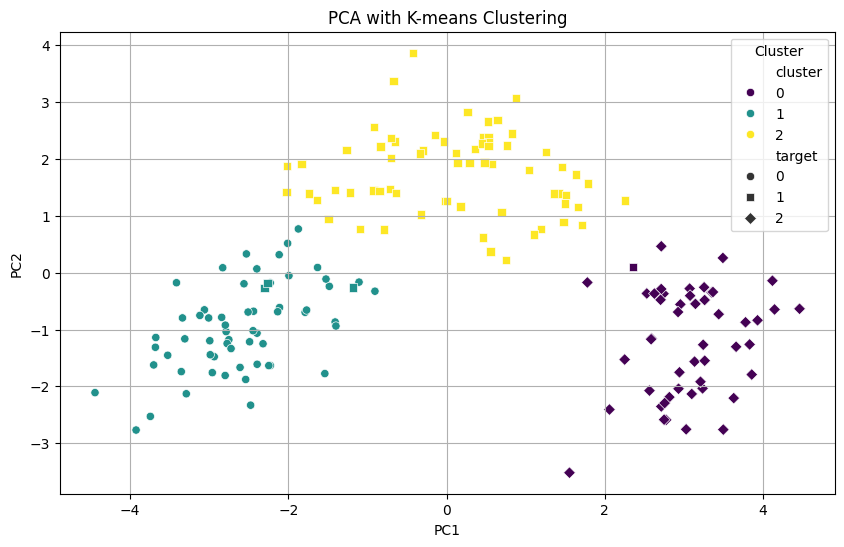

     target  cluster
0         0        1
1         0        1
2         0        1
3         0        1
4         0        1
..      ...      ...
173       2        0
174       2        0
175       2        0
176       2        0
177       2        0

[178 rows x 2 columns]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 標準化を実施
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 主成分分析を実行
pca = PCA(n_components=0.8)
pca_data = pca.fit_transform(scaled_data)

# K-meansクラスタリングを実行
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# クラスタリング結果を元のデータフレームに追加
df['cluster'] = cluster_labels

# クラスタリング結果をCSVファイルとして保存
df.to_csv('wine_with_clusters.csv', index=False)

# クラスタリング結果をPC1とPC2を使い散布図で表示(Target値で色分け)
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, pca_data.shape[1] + 1)])
pca_df['target'] = wine_data.target
pca_df['cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='cluster', palette='viridis', style='target', markers=['o', 's', 'D'])
plt.title('PCA with K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# targetとクラスタリング結果を比較
comparison_df = pd.DataFrame({'target': wine_data.target, 'cluster': cluster_labels})
print(comparison_df)


Accuracy: 97.75280898876404


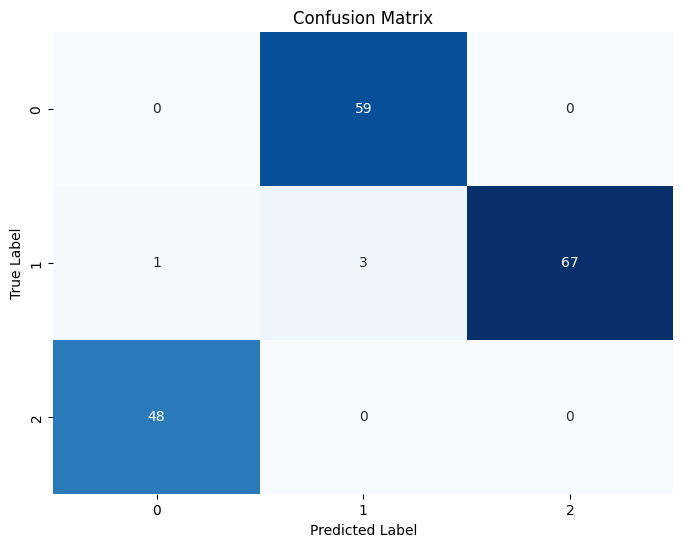

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 正解のクラスタ番号を設定
correct_cluster = {0: 1, 1: 2, 2: 0}

# クラスタ番号とtargetの値が一致しているかどうかを確認
comparison_df['Correct'] = comparison_df['cluster'] == comparison_df['target'].map(correct_cluster)

# 正答率を計算する
accuracy = comparison_df['Correct'].sum() / len(comparison_df) * 100

print("Accuracy:", accuracy)

# 混同行列を作成
conf_matrix = confusion_matrix(comparison_df['target'], comparison_df['cluster'])

# ヒートマップを描画
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### GPT プロンプト : クラスタリングを使ったboxplot

* 与えられたデータフレームをクラスタごとに分割
* 各クラスタの数値カラムの分布をボックスプロットで表示(今回はtargetも含める)
* boxplotは横向き
* Pythonコード

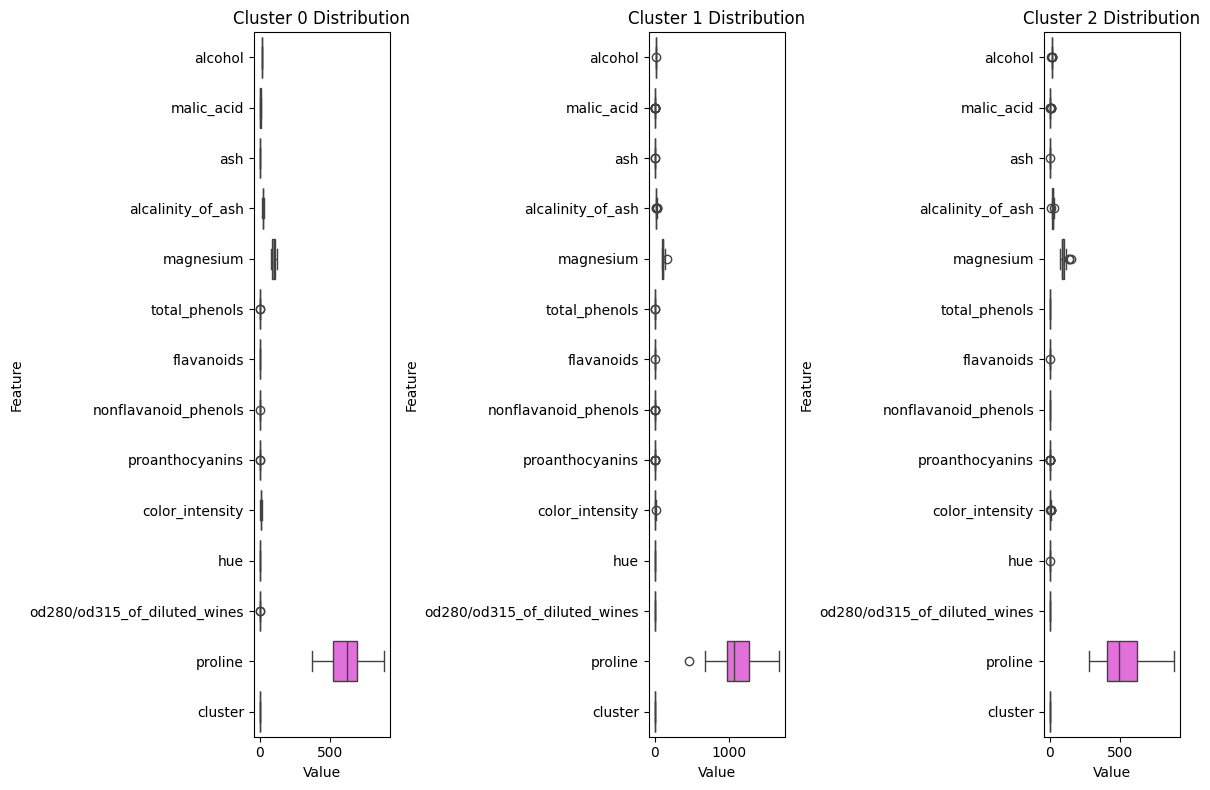

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# クラスタごとにデータフレームを分割する関数を定義
def split_dataframe_by_cluster(df, cluster_column):
    clusters = df[cluster_column].unique()
    return {cluster: df[df[cluster_column] == cluster] for cluster in clusters}

# クラスタごとにデータフレームを分割
clustered_dataframes = split_dataframe_by_cluster(df, 'cluster')

# 各クラスタの数値カラムの分布をボックスプロットで表示
plt.figure(figsize=(12, 8))
for cluster, cluster_df in clustered_dataframes.items():
    plt.subplot(1, len(clustered_dataframes), cluster+1)
    sns.boxplot(data=cluster_df, orient='h')
    plt.title(f'Cluster {cluster} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### GPT プロンプト : 積み上げグラフ

* 与えられたデータフレームをクラスタごとに平均値を計算する(Targetとクラスタ番号は除く)
* 各クラスタ内の各項目の合計を100％として正規化する
* 正規化されたデータを積み上げ棒グラフとしてプロット
* クラスタに所属する数に依存しないように、各項目毎、クラスタの平均値を利用し、その平均を100%に正規化
* Pythonコード

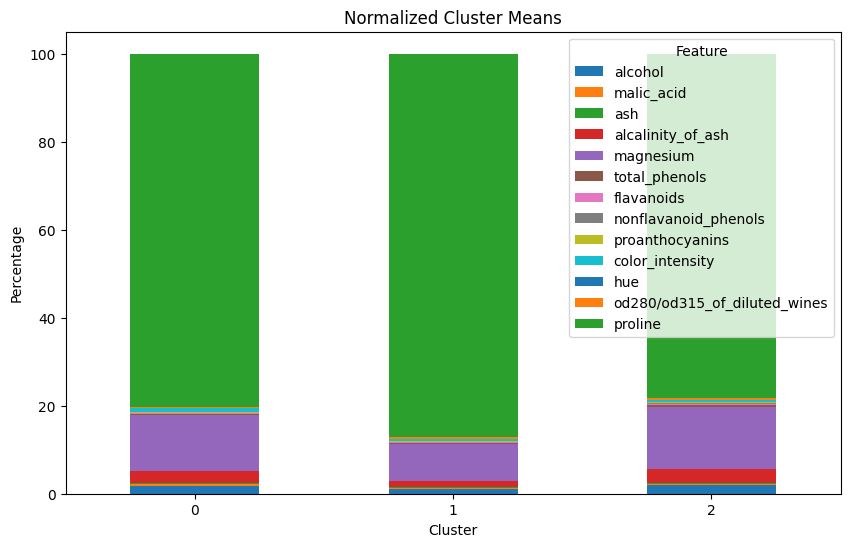

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# クラスタごとに平均値を計算
cluster_means = df.groupby('cluster').mean()

# クラスタごとの合計を100%として正規化
normalized_cluster_means = cluster_means.div(cluster_means.sum(axis=1), axis=0) * 100

# 積み上げ棒グラフとしてプロット
normalized_cluster_means.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Cluster Means')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.show()


## 6. ベイジアンネットワーク

ベイジアンネットワーク（Bayesian Network）は、確率的グラフィカルモデルの一種であり、変数間の依存関係を表現するために使用されます。ベイジアンネットワークは、確率的な因果関係や依存関係をグラフの形式で表現し、ベイジアン統計学の原理に基づいて推論や予測を行うためのツールです。

ベイジアンネットワークの概要：

1. **ノード（Nodes）**：
   - ノードは変数を表し、その変数が表す事象を示します。例えば、病気の有無、症状の有無、治療法などがノードになります。

2. **エッジ（Edges）**：
   - エッジはノード間の依存関係を表します。あるノードから別のノードへのエッジがある場合、それらの変数間には因果関係や依存関係が存在することを示します。

3. **条件付き確率表（Conditional Probability Tables, CPT）**：
   - 各ノードには、そのノードが他のノードに依存する場合の条件付き確率が含まれます。これは、ノードの親ノードの状態に応じて、そのノードが特定の状態になる確率を示します。

4. **グラフ構造**：
   - ベイジアンネットワークは、ノードとエッジのグラフ構造で表されます。このグラフ構造は、変数間の因果関係や依存関係を視覚的に示します。

ベイジアンネットワークの分析の流れ：

1. **モデルの構築**：
   - 分析の最初のステップは、ベイジアンネットワークの構築です。これには、問題領域の理解、変数の特定、変数間の因果関係の推定が含まれます。

2. **データの収集と前処理**：
   - モデルを構築するために、関連するデータを収集し、適切な形式に前処理します。これには欠損値の処理、データの変換、外れ値の除去などが含まれます。離散化のプロセスも重要。

3. **モデルの学習**：
   - データが利用可能な場合、ベイジアンネットワークのパラメータ（条件付き確率表）を学習します。これには、最尤推定やベイズ推定などの手法が使用されます。

4. **モデルの評価**：
   - 学習されたベイジアンネットワークを評価し、モデルの適合度や予測性能を評価します。これには、交差検証や情報規準などの手法が使用されます。構造学習で自動的にネットワークを作ることも多い。

5. **モデルの利用**：
   - 最終的に、学習されたベイジアンネットワークを使用して推論や予測を行います。これには、未知の事象の予測、因果関係の解明、意思決定支援などが含まれます。

ベイジアンネットワークは、医療診断、リスク評価、金融モデリング、自然言語処理など、さまざまな領域で幅広く活用されています。

### 6.1 データの離散化

### GPT プロンプト : データの離散化
* 与えられたデータフレーム df をコピーし、非数値列を除外して数値列のみを取得する
* Targetを除くその他の各数値特徴量を等頻度ビニングで3つのカテゴリ(Low, Medium, High)に分割し、新しいカテゴリ列を作成する
* Targetはカテゴリカル変数なので、そのまま利用する
* 離散化されたデータのみを含む新しいデータフレーム df_discrete を作成し、それをCSVファイルとして保存する
* Pythonコード

In [14]:
# ワインデータセットをロード
wine_data = load_wine()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = wine_data.target

# 数値列のみを取得し、Targetを除く
numeric_columns = df.select_dtypes(include=['number']).columns.drop('target')

# 各数値特徴量を等頻度ビニングで3つのカテゴリに分割し、新しいカテゴリ列を作成
df_discrete = pd.DataFrame()
for column in numeric_columns:
    df_discrete[column + '_category'] = pd.qcut(df[column], q=3, labels=['Low', 'Medium', 'High'])

# Target列をそのまま追加
df_discrete['target'] = df['target']

# CSVファイルとして保存
df_discrete.to_csv('discrete_data.csv', index=False)
df_discrete

alcohol_category malic_acid_category ash_category  \
0               High              Medium       Medium   
1             Medium              Medium          Low   
2             Medium              Medium         High   
3               High              Medium         High   
4             Medium                High         High   
..               ...                 ...          ...   
173             High                High       Medium   
174           Medium                High       Medium   
175           Medium                High          Low   
176           Medium                High       Medium   
177             High                High         High   

    alcalinity_of_ash_category magnesium_category total_phenols_category  \
0                          Low               High                   High   
1                          Low             Medium                   High   
2                       Medium             Medium                   High   
3                          Low               High                   High   
4                       Medium               High                   High   
..                         ...                ...                    ...   
173                     Medium             Medium                    Low   
174                       High             Medium                    Low   
175                     Medium               High                    Low   
176                     Medium               High                    Low   
177                       High             Medium                 Medium   

    flavanoids_category nonflavanoid_phenols_category  \
0                  High                           Low   
1                  High                           Low   
2                  High                        Medium   
3                  High                           Low   
4                  High                        Medium   
..                  ...                           ...   
173                 Low                          High   
174                 Low                          High   
175                 Low                          High   
176                 Low                          High   
177                 Low                          High   

    proanthocyanins_category color_intensity_category hue_category  \
0                       High                   Medium       Medium   
1                        Low                   Medium       Medium   
2                       High                     High       Medium   
3                       High                     High          Low   
4                     Medium                   Medium       Medium   
..                       ...                      ...          ...   
173                      Low                     High          Low   
174                   Medium                     High          Low   
175                      Low                     High          Low   
176                   Medium                     High          Low   
177                      Low                     High          Low   

    od280/od315_of_diluted_wines_category proline_category  target  
0                                    High             High       0  
1                                    High             High       0  
2                                    High             High       0  
3                                    High             High       0  
4                                  Medium           Medium       0  
..                                    ...              ...     ...  
173                                   Low           Medium       2  
174                                   Low           Medium       2  
175                                   Low           Medium       2  
176                                   Low             High       2  
177                                   Low              Low       2  

[178 rows x 14 columns]

### 6.2 構造学習(pgmpy利用)

ベイジアンネットワークの構造学習は、与えられたデータから最適なベイジアンネットワークの構造（つまり、ノード間の依存関係や結合強度）を推定するタスクです。ベイジアンネットワークは、変数間の因果関係を表現するための確率的なグラフモデルであり、構造学習はそのグラフ構造を特定するための手法です。

ベイジアンネットワークの構造学習には、主に2つのアプローチがあります。

1. 制約ベースの学習（Constraint-Based Learning）: このアプローチでは、データセットから条件付き独立性を見つけ出し、それを使用してベイジアンネットワークの構造を推定します。代表的なアルゴリズムとしては、PCアルゴリズム（PC algorithm）やGESアルゴリズム（Greedy Equivalence Search algorithm）などがあります。これらのアルゴリズムは、データから条件付き独立性を推定し、それを基にネットワークの構造を推測します。

2. スコアベースの学習（Score-Based Learning）: このアプローチでは、ネットワーク構造の候補を評価するスコア関数を定義し、最適な構造を選択します。代表的なアルゴリズムには、ベイジアン情報規準（Bayesian Information Criterion、BIC）や最大事後確率（Maximum A Posteriori、MAP）推定を使用する方法があります。これらのアルゴリズムは、モデルの複雑さとフィット度をバランスさせることで最適なモデルを見つけます。

構造学習の目的は、与えられたデータに最も適合するベイジアンネットワークの構造を見つけることです。適切な構造を持つベイジアンネットワークは、データの生成プロセスを正確にモデル化し、変数間の因果関係を理解するのに役立ちます。

In [15]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.7 MB/s eta 0:00:00


### GPT プロンプト : 構造学習

* `pgmpy` ライブラリから必要なモジュールをインポートする。
* 離散化されたデータフレーム`df_discrete`を利用する
* `pgmpy.estimators.HillClimbSearch` を使用して、BICスコアを指標として最適なモデル構造を探索する。
* 探索された最適なモデル構造を使用して、`pgmpy.models.BayesianModel` を初期化する。
* モデルのパラメータ学習には、最尤推定法 (`pgmpy.estimators.MaximumLikelihoodEstimator`) を使用する。
* 学習された条件付き確率表（CPT）を表示する。


In [16]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator

# BICスコアを用いたヒルクライミング検索を初期化
hc = HillClimbSearch(df_discrete)

# BICスコアを指定して最適なモデル構造を推定
best_model = hc.estimate(scoring_method=BicScore(df_discrete))
print("Best model structure:", best_model.edges())

# モデルの初期化
model = BayesianModel(best_model.edges())

# パラメータ学習（最尤推定法を使用）
model.fit(df_discrete, estimator=MaximumLikelihoodEstimator)

# 学習された条件付き確率表（CPT）の表示
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


  0%|          | 0/1000000 [00:00<?, ?it/s]

Best model structure: [('alcalinity_of_ash_category', 'target'), ('flavanoids_category', 'total_phenols_category'), ('flavanoids_category', 'od280/od315_of_diluted_wines_category'), ('flavanoids_category', 'proanthocyanins_category'), ('flavanoids_category', 'nonflavanoid_phenols_category'), ('proline_category', 'magnesium_category'), ('target', 'flavanoids_category'), ('target', 'proline_category'), ('target', 'color_intensity_category'), ('target', 'alcohol_category'), ('target', 'hue_category'), ('target', 'malic_acid_category'), ('target', 'ash_category')]
CPD of alcalinity_of_ash_category:
+------------------------------------+----------+
| alcalinity_of_ash_category(High)   | 0.275281 |
+------------------------------------+----------+
| alcalinity_of_ash_category(Low)    | 0.353933 |
+------------------------------------+----------+
| alcalinity_of_ash_category(Medium) | 0.370787 |
+------------------------------------+----------+
CPD of target:
+----------------------------+---

### GPT プロンプト

* 学習されたベイジアンネットワークの構造は、以下のエッジで与えられる：`best_model.edges()`
* グラフ描画には、`networkx`と`matplotlib`を使用する。
* 描画されたグラフは、ノードとエッジを明確に区別し、エッジには矢印が表示されるようにする。
* ノードのラベル、ノードの大きさ、ノードの色、フォントサイズなどの詳細な描画設定を適切に調整する。
* 学習されたベイジアンネットワークの構造を可視化したグラフを出力する。

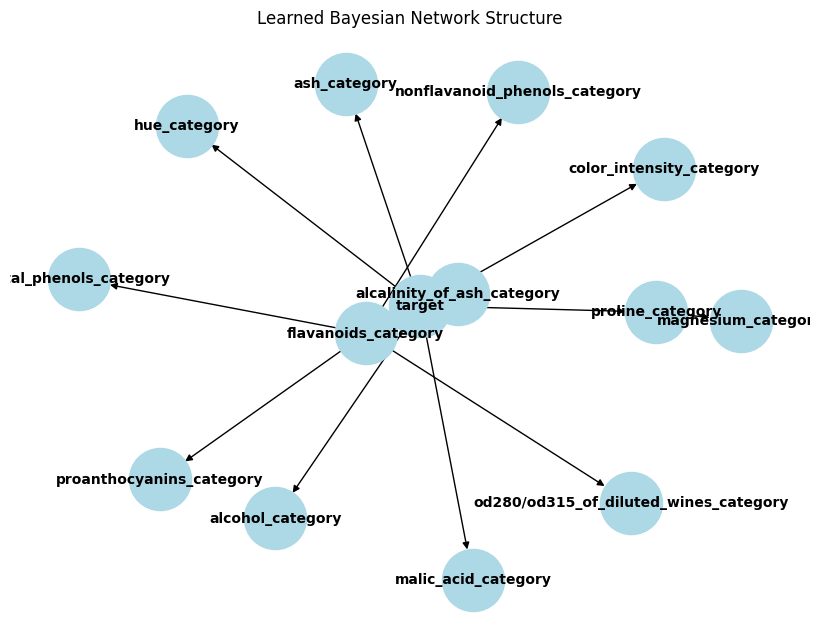

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# 学習されたベイジアンネットワークのエッジを取得
edges = best_model.edges()

# ベイジアンネットワークのグラフオブジェクトを作成
G = nx.DiGraph(edges)

# グラフの描画
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # ノードの配置アルゴリズムを指定
nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Learned Bayesian Network Structure")
plt.show()


## 6.3 確率的推論の実施

In [21]:
from pgmpy.inference import VariableElimination

# 推論オブジェクトの作成
inference = VariableElimination(model)

# 特定の変数の確率分布をクエリ
result = inference.query(variables=['alcohol_category'], evidence={'target': 0})

# 結果の表示
print(result)


+--------------------------+-------------------------+
| alcohol_category         |   phi(alcohol_category) |
+==========================+=========================+
| alcohol_category(High)   |                  0.7119 |
+--------------------------+-------------------------+
| alcohol_category(Low)    |                  0.0000 |
+--------------------------+-------------------------+
| alcohol_category(Medium) |                  0.2881 |
+--------------------------+-------------------------+


In [22]:
from pgmpy.inference import VariableElimination

# 推論オブジェクトの作成
inference = VariableElimination(model)

# 特定の変数の確率分布をクエリ
result = inference.query(variables=['hue_category'], evidence={'target': 0})

# 結果の表示
print(result)


+----------------------+---------------------+
| hue_category         |   phi(hue_category) |
+======================+=====================+
| hue_category(High)   |              0.4576 |
+----------------------+---------------------+
| hue_category(Low)    |              0.0508 |
+----------------------+---------------------+
| hue_category(Medium) |              0.4915 |
+----------------------+---------------------+
